In [1]:
!pip install tensorflow pandas numpy matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

2025-08-20 15:01:18.851302: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-20 15:01:18.907592: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-20 15:01:20.880281: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [3]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [4]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1) 
])

2025-08-20 15:01:25.290917: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/gitpod/.pyenv/versions/3.12.11/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/20


59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0079 - val_loss: 8.9178e-04
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 8.2241e-04 - val_loss: 9.0981e-04
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 8.9153e-04 - val_loss: 0.0046
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 8.2479e-04 - val_loss: 0.0016
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 6.9026e-04 - val_loss: 0.0017
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 7.0933e-04 - val_loss: 0.0017
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 6.5423e-04 - val_loss: 7.7271e-04
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 6.6341e-04 - val_loss: 0.0024
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 6.1605e-04 - val_loss: 0.0011
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 6.0842e-04 - val_loss: 6.2988e-04
Epoch 12/20
59/59 ━━━━

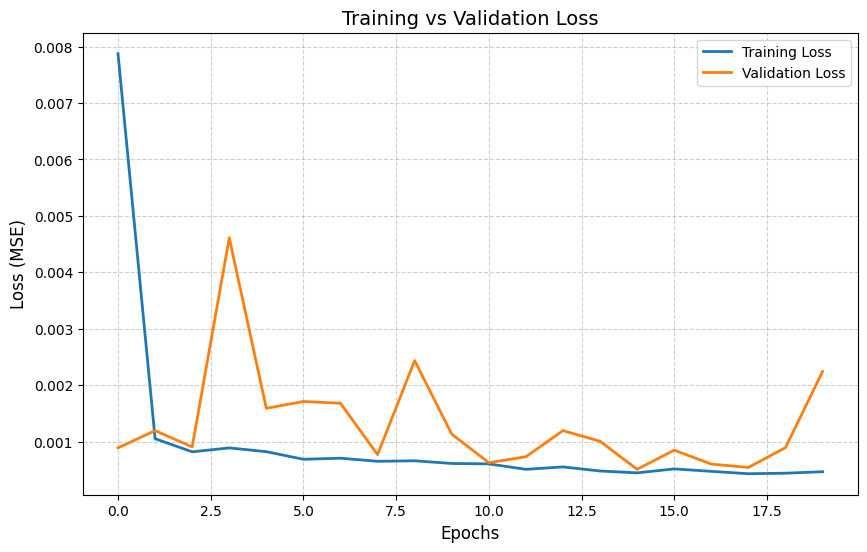

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title("Training vs Validation Loss", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss (MSE)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [8]:
model.save('stock_lstm_model.h5')